# 模拟交易

这里打算计算一些指标然后模拟投资，这个指标暂时先乱算吧，先把交易模拟过程搭建出来。


In [72]:
import pandas as pd
import matplotlib.pyplot as plt
from constants import *

%matplotlib inline

In [73]:
# 先定义一些数据标签

LABEL_GOLD_INCREASE_PERCENT_BY_YESTERDAY = 'Gold Increase Percent By Yesterday'
LABEL_BTC_INCREASE_PERCENT_BY_YESTERDAY = 'BTC Increase Percent By Yesterday'

LABEL_GOLD_SCORE = 'Gold Score'
LABEL_BTC_SCORE = 'BTC Score'

## 导入并计算

计算以下指标：

1. 增长率。预测值相对前一日实际值的增长率。
    $$ 增长率 = \frac{Value_{T+1} - Value_{T} }{ Value_{T} } $$
2. 乖离率。预测值相对于过去10日的偏离率。
   $$ 乖离率 = \frac{ Value_{T+1} - \frac{1}{n}\times \Sigma_{t \in [T-5,T) }{Value_{t} }  }{\frac{1}{n}\times \Sigma_{t \in [T-5,T) }{Value_{t} }} $$

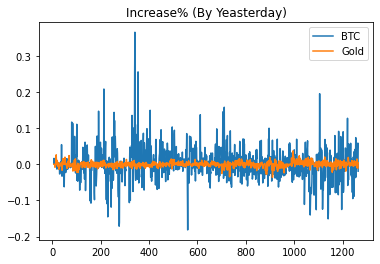

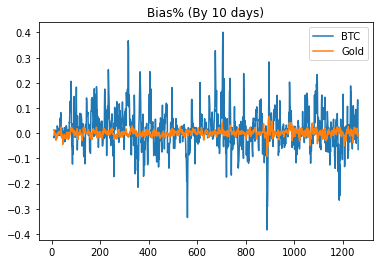

,Unnamed: 0,Date,Value,USD (PM),Gold Deal Open,BTC Value's Mean,Gold Value's Mean,BTC Prediction,Gold Prediction,BTC Increasement Percent,Gold Increasement Percent,BTC Increasement Percent Actual,Gold Increasement Percent Actual,Bias BTC,Bias Gold
7,7,2016-09-21,598.88,1326.10,True,0.000,0.000,610.188904,1313.800659,0.002553,4.970814e-07,-0.016068,0.009362,NaN,NaN
8,8,2016-09-22,597.42,1339.10,True,0.000,0.000,608.660034,1326.098633,0.016370,-1.020975e-06,-0.002438,0.009803,NaN,NaN
9,9,2016-09-23,594.08,1338.65,True,605.813,1322.165,597.492676,1339.098511,0.000122,-1.112507e-06,-0.005591,-0.000336,-0.013734,0.012807
10,10,2016-09-26,598.98,1340.50,True,604.744,1323.755,594.080750,1338.649780,0.000001,-1.639139e-07,0.008248,0.001382,-0.017633,0.011252
11,11,2016-09-27,605.96,1327.00,True,604.248,1324.090,597.510132,1340.306885,-0.002426,-1.455277e-04,0.011653,-0.010071,-0.011151,0.012248
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1260,1260,2021-09-06,51769.06,1821.60,True,48673.012,1806.875,49403.023438,1808.892456,0.001430,-8.128867e-03,0.049465,-0.001152,0.014998,0.001117
1261,1261,2021-09-07,52677.40,1802.15,True,49007.184,1806.890,53898.691406,1819.034302,0.040428,-1.423687e-03,0.017546,-0.010677,0.099812,0.006721
1262,1262,2021-09-08,46809.17,1786.00,True,48735.751,1804.645,55196.207031,1781.886963,0.053810,-1.134549e-02,-0.111399,-0.008962,0.132561,-0.012611
1263,1263,2021-09-09,46078.38,1788.25,True,48569.131,1804.600,49512.269531,1794.879028,0.058663,4.965205e-03,-0.015612,0.001260,0.019418,-0.005387


In [74]:
all_tradings = pd.read_csv('predictions/all_trading_check_point_all.csv')
all_tradings[LABEL_BTC_INCREASE_PERCENT] = (all_tradings[LABEL_PREDICTION_BTC] - all_tradings[LABEL_BITCOIN_VALUE].shift(1))/all_tradings[LABEL_BITCOIN_VALUE]
all_tradings[LABEL_GOLD_INCREASE_PERCENT] =  (all_tradings[LABEL_PREDICTION_GOLD] - all_tradings[LABEL_GOLD_VALUE].shift(1))/all_tradings[LABEL_GOLD_VALUE]
all_tradings[LABEL_BTC_INCREASE_PERCENT_ACTUAL] = all_tradings[LABEL_BITCOIN_VALUE].pct_change()
all_tradings[LABEL_GOLD_INCREASE_PERCENT_ACTUAL] = all_tradings[LABEL_GOLD_VALUE].pct_change()
all_tradings[LABEL_BIAS_BTC] = all_tradings[LABEL_PREDICTION_BTC] / \
    all_tradings[LABEL_BITCOIN_VALUE].rolling(window=10).mean()-1
all_tradings[LABEL_BIAS_GOLD] = all_tradings[LABEL_PREDICTION_GOLD] / \
    all_tradings[LABEL_GOLD_VALUE].rolling(window=10).mean()-1
all_tradings = all_tradings.iloc[7:,:]


def plot_and_show(title, gold_values, btc_values):
    plt.plot(btc_values, label='BTC')
    plt.plot(gold_values, label='Gold')
    plt.legend()
    plt.title(title)
    plt.show()

plot_and_show('Increase% (By Yeasterday)', all_tradings[LABEL_GOLD_INCREASE_PERCENT], all_tradings[LABEL_BTC_INCREASE_PERCENT])
plot_and_show('Bias% (By 10 days)', all_tradings[LABEL_BIAS_GOLD], all_tradings[LABEL_BIAS_BTC])

all_tradings


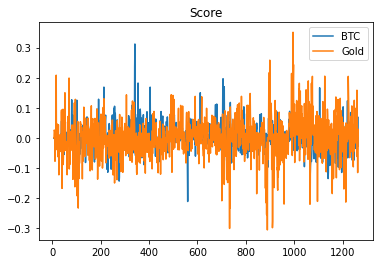

,Unnamed: 0,Date,Value,USD (PM),Gold Deal Open,BTC Value's Mean,Gold Value's Mean,BTC Prediction,Gold Prediction,BTC Increasement Percent,Gold Increasement Percent,BTC Increasement Percent Actual,Gold Increasement Percent Actual,Bias BTC,Bias Gold,BTC Score,Gold Score
7,7,2016-09-21,598.88,1326.10,True,0.000,0.000,610.188904,1313.800659,0.002553,4.970814e-07,-0.016068,0.009362,0.000000,0.000000,0.000000,0.000000
8,8,2016-09-22,597.42,1339.10,True,0.000,0.000,608.660034,1326.098633,0.016370,-1.020975e-06,-0.002438,0.009803,0.000000,0.000000,0.000000,0.000000
9,9,2016-09-23,594.08,1338.65,True,605.813,1322.165,597.492676,1339.098511,0.000122,-1.112507e-06,-0.005591,-0.000336,-0.013734,0.012807,-0.002649,0.025606
10,10,2016-09-26,598.98,1340.50,True,604.744,1323.755,594.080750,1338.649780,0.000001,-1.639139e-07,0.008248,0.001382,-0.017633,0.011252,-0.003526,0.022503
11,11,2016-09-27,605.96,1327.00,True,604.248,1324.090,597.510132,1340.306885,-0.002426,-1.455277e-04,0.011653,-0.010071,-0.011151,0.012248,-0.004171,0.023331
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1260,1260,2021-09-06,51769.06,1821.60,True,48673.012,1806.875,49403.023438,1808.892456,0.001430,-8.128867e-03,0.049465,-0.001152,0.014998,0.001117,0.004143,-0.062798
1261,1261,2021-09-07,52677.40,1802.15,True,49007.184,1806.890,53898.691406,1819.034302,0.040428,-1.423687e-03,0.017546,-0.010677,0.099812,0.006721,0.052305,0.002053
1262,1262,2021-09-08,46809.17,1786.00,True,48735.751,1804.645,55196.207031,1781.886963,0.053810,-1.134549e-02,-0.111399,-0.008962,0.132561,-0.012611,0.069560,-0.115986
1263,1263,2021-09-09,46078.38,1788.25,True,48569.131,1804.600,49512.269531,1794.879028,0.058663,4.965205e-03,-0.015612,0.001260,0.019418,-0.005387,0.050814,0.028948


In [75]:
# 这里定两个常数，虽然按照实际情况来说我们不应该知道后面二段数据
# 但是可以认为我们是设置了一个合适的常熟

all_tradings[LABEL_BTC_SCORE] = (all_tradings[LABEL_BTC_INCREASE_PERCENT] * 0.8 + all_tradings[LABEL_BIAS_BTC] * 0.2)
all_tradings[LABEL_GOLD_SCORE] = (all_tradings[LABEL_GOLD_INCREASE_PERCENT] * 0.8 + all_tradings[LABEL_BIAS_GOLD] * 0.2) / 0.1
all_tradings.fillna(0, inplace=True)

plot_and_show('Score', all_tradings[LABEL_GOLD_SCORE], all_tradings[LABEL_BTC_SCORE])

all_tradings

In [76]:
def try_trade(commission_rate_gold = 0.02, commission_rate_btc = 0.01, sell_percent=0.8, buy_percent=0.05, score_base=0.1):
    all_tradings[LABEL_ASSETS_CASH] = 10000.0
    all_tradings[LABEL_ASSETS_BTC] = 0.0
    all_tradings[LABEL_ASSETS_GOLD] = 0.0

    for day in range(all_tradings.shape[0]):
        # 更新资产
        if day >= 1:
            all_tradings[LABEL_ASSETS_CASH].iat[day] = all_tradings[LABEL_ASSETS_CASH].iat[day-1]
            all_tradings[LABEL_ASSETS_BTC].iat[day] = all_tradings[LABEL_ASSETS_BTC].iat[day-1] * (
                1+all_tradings[LABEL_BTC_INCREASE_PERCENT_ACTUAL].iat[day-1])
            all_tradings[LABEL_ASSETS_GOLD].iat[day] = all_tradings[LABEL_ASSETS_GOLD].iat[day-1] * (
                1+all_tradings[LABEL_GOLD_INCREASE_PERCENT_ACTUAL].iat[day-1])

        if abs(all_tradings[LABEL_BTC_SCORE].iat[day]) <= score_base:
            pass
        elif all_tradings[LABEL_BTC_SCORE].iat[day] < -score_base and all_tradings[LABEL_ASSETS_BTC].iat[day] > 0:
            # 预测即将亏损，需要把持仓量减少
            # sell_percent = 0.8
            all_tradings[LABEL_ASSETS_CASH].iat[day] += (
                all_tradings[LABEL_ASSETS_BTC].iat[day] * sell_percent * all_tradings[LABEL_BITCOIN_VALUE].iat[day] * (1-commission_rate_btc))
            all_tradings[LABEL_ASSETS_BTC].iat[day] *= (1-sell_percent)
        elif all_tradings[LABEL_BTC_SCORE].iat[day] > score_base and all_tradings[LABEL_ASSETS_CASH].iat[day] > 0:
            # 预测即将盈利，需要把持仓量增加
            # buy_percent = 0.01
            how_much = all_tradings[LABEL_ASSETS_CASH].iat[day] * buy_percent
            all_tradings[LABEL_ASSETS_BTC].iat[day] += (how_much * (
                1-commission_rate_btc) / all_tradings[LABEL_BITCOIN_VALUE].iat[day])
            all_tradings[LABEL_ASSETS_CASH].iat[day] *= (1-buy_percent)

        
        if not all_tradings[LABEL_GOLD_DEAL_OPEN].iat[day] or abs(all_tradings[LABEL_GOLD_SCORE].iat[day]) <= score_base:
            pass
        elif all_tradings[LABEL_GOLD_SCORE].iat[day] < -score_base and all_tradings[LABEL_ASSETS_GOLD].iat[day] > 0:
            # 预测即将亏损，需要把持仓量减少
            # sell_percent = 0.8
            all_tradings[LABEL_ASSETS_CASH].iat[day] += (
                all_tradings[LABEL_ASSETS_GOLD].iat[day] * sell_percent * all_tradings[LABEL_GOLD_VALUE].iat[day] * (1-commission_rate_gold))
            all_tradings[LABEL_ASSETS_GOLD].iat[day] *= (1-sell_percent)
        elif all_tradings[LABEL_GOLD_SCORE].iat[day] > score_base and all_tradings[LABEL_ASSETS_CASH].iat[day] > 0:
            # 预测即将盈利，需要把持仓量增加
            # buy_percent = 0.01
            how_much = all_tradings[LABEL_ASSETS_CASH].iat[day] * buy_percent
            all_tradings[LABEL_ASSETS_GOLD].iat[day] += (how_much * (
                1-commission_rate_gold) / all_tradings[LABEL_GOLD_VALUE].iat[day])
            all_tradings[LABEL_ASSETS_CASH].iat[day] *= (1-buy_percent)

    return all_tradings

try_trade()

,Unnamed: 0,Date,Value,USD (PM),Gold Deal Open,BTC Value's Mean,Gold Value's Mean,BTC Prediction,Gold Prediction,BTC Increasement Percent,Gold Increasement Percent,BTC Increasement Percent Actual,Gold Increasement Percent Actual,Bias BTC,Bias Gold,BTC Score,Gold Score,Cash In Hand,BTC In Hand,Gold In Hand
7,7,2016-09-21,598.88,1326.10,True,0.000,0.000,610.188904,1313.800659,0.002553,4.970814e-07,-0.016068,0.009362,0.000000,0.000000,0.000000,0.000000,10000.000000,0.000000,0.000000
8,8,2016-09-22,597.42,1339.10,True,0.000,0.000,608.660034,1326.098633,0.016370,-1.020975e-06,-0.002438,0.009803,0.000000,0.000000,0.000000,0.000000,10000.000000,0.000000,0.000000
9,9,2016-09-23,594.08,1338.65,True,605.813,1322.165,597.492676,1339.098511,0.000122,-1.112507e-06,-0.005591,-0.000336,-0.013734,0.012807,-0.002649,0.025606,10000.000000,0.000000,0.000000
10,10,2016-09-26,598.98,1340.50,True,604.744,1323.755,594.080750,1338.649780,0.000001,-1.639139e-07,0.008248,0.001382,-0.017633,0.011252,-0.003526,0.022503,10000.000000,0.000000,0.000000
11,11,2016-09-27,605.96,1327.00,True,604.248,1324.090,597.510132,1340.306885,-0.002426,-1.455277e-04,0.011653,-0.010071,-0.011151,0.012248,-0.004171,0.023331,10000.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1260,1260,2021-09-06,51769.06,1821.60,True,48673.012,1806.875,49403.023438,1808.892456,0.001430,-8.128867e-03,0.049465,-0.001152,0.014998,0.001117,0.004143,-0.062798,29933.389990,0.153189,4.815870
1261,1261,2021-09-07,52677.40,1802.15,True,49007.184,1806.890,53898.691406,1819.034302,0.040428,-1.423687e-03,0.017546,-0.010677,0.099812,0.006721,0.052305,0.002053,29933.389990,0.160766,4.810325
1262,1262,2021-09-08,46809.17,1786.00,True,48735.751,1804.645,55196.207031,1781.886963,0.053810,-1.134549e-02,-0.111399,-0.008962,0.132561,-0.012611,0.069560,-0.115986,36597.004032,0.163587,0.951793
1263,1263,2021-09-09,46078.38,1788.25,True,48569.131,1804.600,49512.269531,1794.879028,0.058663,4.965205e-03,-0.015612,0.001260,0.019418,-0.005387,0.050814,0.028948,36597.004032,0.145363,0.943263
